# DDoS attacks detection and characterization

First, we need to import the necessary libraries.

In [54]:
# import needed python libraries

%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import colorcet as cc
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score

## Unsupervised learning - classification
Now we load the transformed dataset from the csv we created in the previous jupyter notebook.

In [3]:
# Load the dataset
df = pd.read_csv("pca_dataset.csv", header=0, index_col=0, engine='python')

df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,label
0,-0.284227,-1.031528,-0.847474,-0.174401,-0.867714,2.738893,-1.021160,0.572375,-0.200909,-0.113964,...,-0.016240,0.004520,-0.007726,-0.000549,-0.003569,0.017081,-0.043824,-0.007183,0.000671,ddos_dns
1,-0.334613,-0.665187,-0.962476,0.405087,0.461767,0.124486,0.106917,-0.091467,-0.061478,0.092113,...,0.047349,-0.064328,0.045066,0.027939,0.008969,-0.026256,0.016200,0.037482,0.021847,ddos_dns
2,-0.307742,-1.144423,-0.991048,-0.167760,-1.485189,4.775312,-1.786339,1.240988,-0.564195,-0.127972,...,-0.013193,0.007981,0.001997,0.018305,-0.012399,0.012201,-0.025050,-0.007868,0.007056,ddos_dns
3,-0.307909,-1.144464,-0.991139,-0.167737,-1.485196,4.775309,-1.786288,1.240995,-0.564174,-0.127970,...,-0.013447,0.007836,0.002022,0.018268,-0.012515,0.012159,-0.025048,-0.007888,0.007066,ddos_dns
4,-0.309101,-1.144294,-0.990969,-0.167914,-1.485369,4.773705,-1.784758,1.241510,-0.564316,-0.128338,...,-0.013766,0.007661,0.002087,0.018267,-0.012464,0.012106,-0.025024,-0.007791,0.007097,ddos_dns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64234,-0.771804,-0.805534,-0.358899,-0.476012,-0.524117,-0.706794,1.034228,0.430967,-0.026979,-0.522731,...,-0.009887,0.013770,-0.002440,0.007576,0.001982,0.001835,-0.005733,-0.004297,0.001123,ddos_udp_lag
64235,0.001752,-0.993832,-1.015435,-0.196162,-0.371376,0.959232,-0.221572,0.026344,0.086233,0.215038,...,0.036509,-0.037440,0.007034,-0.013158,0.003226,-0.024392,0.063594,0.018227,-0.013548,ddos_udp_lag
64236,-0.771804,-0.805534,-0.358899,-0.476012,-0.524117,-0.706794,1.034228,0.430967,-0.026979,-0.522731,...,-0.009887,0.013770,-0.002440,0.007576,0.001982,0.001835,-0.005733,-0.004297,0.001123,ddos_udp_lag
64237,-0.022837,-0.974232,-0.985986,-0.190383,-0.352925,0.924495,-0.218127,0.009171,0.093423,0.208569,...,0.037133,-0.034376,0.004909,-0.013977,0.000990,-0.022780,0.067008,0.013820,-0.007303,ddos_udp_lag


## K-means

In [4]:
X = df.drop(columns = 'label').to_numpy()
y = df['label'].values

In [6]:
# k-means
# k-Means with n_clusters = 12
kmeans = KMeans(n_clusters=12)
cl_labels3 = kmeans.fit_predict(X) # Get clusters ID

# Unsupervised metric
silhouette  = silhouette_score(X, cl_labels3)
# Supervised metrics
ri = rand_score(np.ravel(y), cl_labels3)
ari = adjusted_rand_score(np.ravel(y), cl_labels3)

print('k-Means with 12 clusters')
(unique, counts)=np.unique( cl_labels3, return_counts=True)
print("Size of each cluster: ", counts)
print(f'k_means clustering error: {round(kmeans.inertia_, 2)}')
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

k-Means with 3 clusters
Size of each cluster:  [25805  2109 19079   259    41  2736    27  5500   698   266  4083  3636]
k_means clustering error: 1272718.35
Silhouette: 0.55
RI: 0.79
ARI: 0.31


The silhouette ranges between -1 and 1, where 1 indicates that the object is well matched with its own cluster and poorly matched to the others; since we obtained 0.55, the result obtained it's not too bad.

In [7]:
n_cluster_list=[]
shs_list = []
ri_list = []
ari_list = []
inertia_list=[]
for n_clusters in range(5, 20):
    kmeans = KMeans(n_clusters=n_clusters)
    cl_labels = kmeans.fit_predict(X)
    # Unsupervised metric
    silhouette  = silhouette_score(X, cl_labels)
    n_cluster_list.append(n_clusters)
    shs_list.append(silhouette)
    ri_list.append(rand_score(np.ravel(y), cl_labels))
    ari_list.append(adjusted_rand_score(np.ravel(y), cl_labels))
    inertia_list.append(kmeans.inertia_)
    print(f"{n_clusters} clusters: clustering_error {round(kmeans.inertia_, 2)}, silhouette {round(silhouette, 2)}")

In [12]:
for n_clusters in range(20, 25):
    kmeans = KMeans(n_clusters=n_clusters)
    cl_labels = kmeans.fit_predict(X)
    # Unsupervised metric
    silhouette  = silhouette_score(X, cl_labels)
    n_cluster_list.append(n_clusters)
    shs_list.append(silhouette)
    ri_list.append(rand_score(np.ravel(y), cl_labels))
    ari_list.append(adjusted_rand_score(np.ravel(y), cl_labels))
    inertia_list.append(kmeans.inertia_)
    print(f"{n_clusters} clusters: clustering_error {round(kmeans.inertia_, 2)}, silhouette {round(silhouette, 2)}")

20 clusters: clustering_error 718992.0, silhouette 0.66
21 clusters: clustering_error 689471.95, silhouette 0.69
22 clusters: clustering_error 633454.29, silhouette 0.66
23 clusters: clustering_error 608421.03, silhouette 0.7
24 clusters: clustering_error 559549.24, silhouette 0.72


best k:  24  with corresponding silhouette:  0.7184418873773075


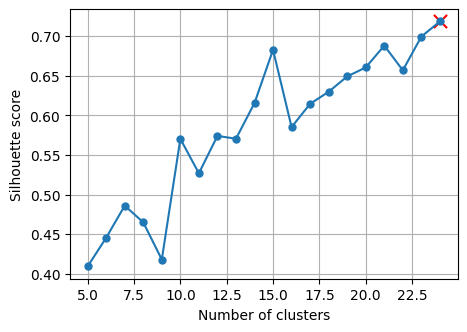

In [13]:
# Get n_clusters leading to the highest silhouette
best_sh= np.max(shs_list)
best_n=n_cluster_list[np.argmax(shs_list)]
print("best k: ",best_n, " with corresponding silhouette: ", best_sh)

# Plot
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,shs_list, marker='o', markersize=5)
plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

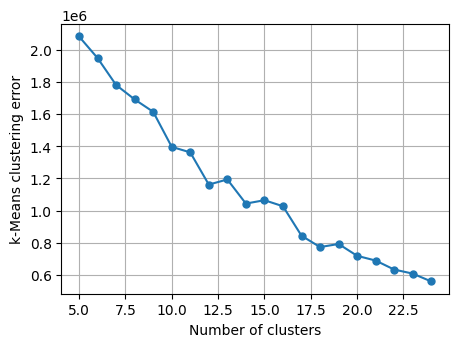

In [14]:
# Plot k-Means clustering error
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,inertia_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('k-Means clustering error')
plt.show()

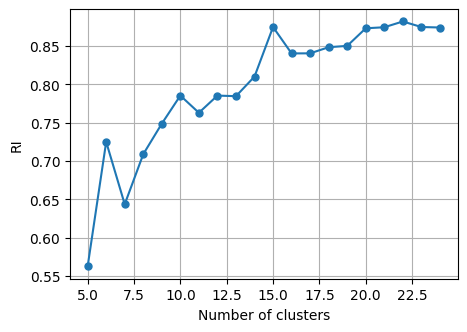

In [15]:
# Plot RI
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,ri_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('RI')
plt.show()

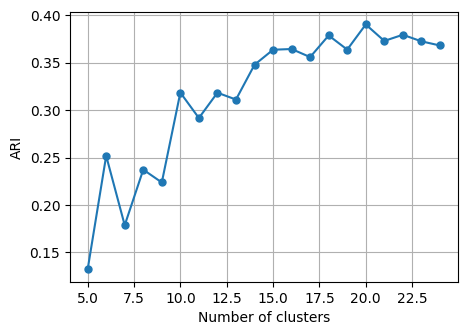

In [16]:
# Plot ARI
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,ari_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('ARI')
plt.show()

In [77]:
 # Helper function to plot the clustering -- only 2 dimensione (if more, it will plot only the first two columns).
def plot_clustering(X, labels, centers=None, title=""):

    plt.plot()
    #colors = sns.color_palette(cc.glasbey, n_colors=25)
    #sns.jointplot(x=X[:,0], y=X[:,1], kind="hex", cmap = cc.glasbey)
    #plt.hexbin(X[:,0], X[:,1], alpha=0.5,  cmap='plasma', gridsize=20)
    # Plot data with labels as color
    plt.scatter(X[:,0], X[:,1], alpha=0.5, c=labels)

    # Plot centers if given
    if centers is not None:
        plt.scatter(
            centers[:, 0], centers[:, 1], c="red", s=150, alpha=0.9, label="Centers"
        )

    # Set title
    plt.title(title)
    plt.grid()
    plt.xlabel("PC_1")
    plt.ylabel("PC_2")
    plt.legend()
    plt.show()

/var/folders/x0/vppspl391z3_qp7t8q5lczn00000gn/T/ipykernel_93283/2974448408.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


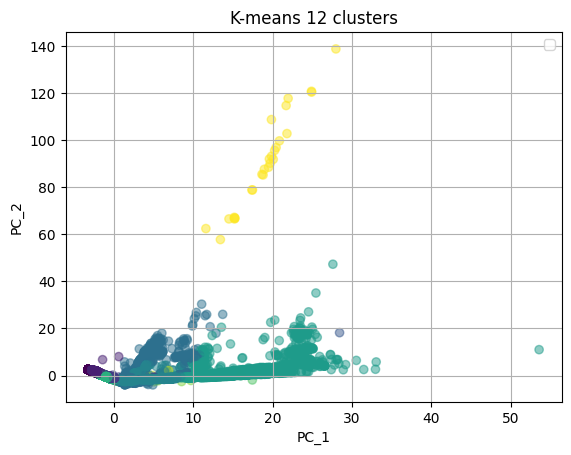

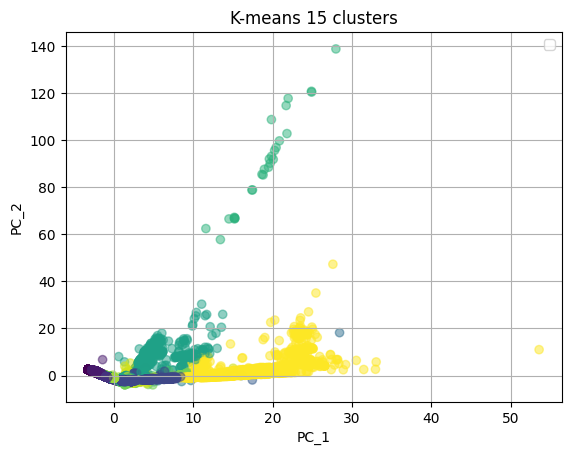

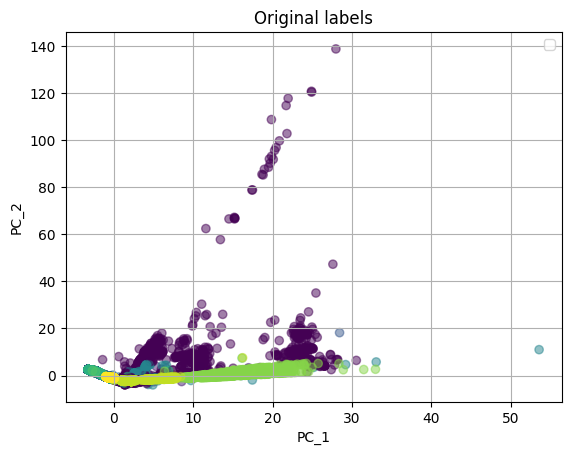

In [78]:
#PLOTS

kmeans = KMeans(n_clusters=12, init='random', random_state=None)
kmeans.fit(X)

kmeans_max = KMeans(n_clusters=15, init='random', random_state=None)
kmeans_max.fit(X)

X_two_components = X[:,0:3]

plot_clustering(X_two_components, kmeans.labels_, None, "K-means 12 clusters")
plot_clustering(X_two_components, kmeans_max.labels_, None, "K-means 15 clusters")
mapper = lambda s: 0 if s == "benign" else (1 if s == "ddos_dns" else (2 if s == "ddos_ldap" else (3 if s == "ddos_mssql" else (4 if s == "ddos_netbios" else (5 if s == "ddos_ntp" else (6 if s == "ddos_snmp" else (7 if s == "ddos_ssdp" else (8 if s == "ddos_udp" else (9 if s == "ddos_syn" else (10 if s == "ddos_tftp" else 11))))))))))
vfunc = np.vectorize(mapper)
plot_clustering(X_two_components, vfunc(y), None, "Original labels")